<a href="https://colab.research.google.com/github/DharmendraSaini/PyTorch-IrisImageClassification/blob/main/PyTorch_IrisImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # input layer(four features of the flower)-->
    # hidden layer (number of neurons) -->
    # H2 (number of neurons) -->
    # Output(3 classes of the iris flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() #instantiate modile nn.Module
        self.fc1 = nn.Linear(in_features, h1) #input layer
        self.fc2 = nn.Linear(h1, h2) #hidden layer 1
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
# pick a manul seed for randomization
torch.manual_seed(42)
# Create an instance of the model
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
# Change the last column variety from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 0.1)
my_df['variety'] = my_df['variety'].replace('Virginica', 0.2)
my_df

/tmp/ipython-input-3410510271.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 0.2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.2
146,6.3,2.5,5.0,1.9,0.2
147,6.5,3.0,5.2,2.0,0.2
148,6.2,3.4,5.4,2.3,0.2


In [9]:
# Train Test Split, set X, y
X = my_df.drop('variety', axis=1).to_numpy()
y = my_df['variety'].to_numpy()


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# Train our model
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # Measure the loss/error
  loss = criterion(y_pred, y_train)

  # Keep track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do back propagation: take the error rate of forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.2963815927505493
Epoch: 10 and loss: 0.5913118124008179
Epoch: 20 and loss: 0.12233331799507141
Epoch: 30 and loss: 0.003725816495716572
Epoch: 40 and loss: 0.00026061467360705137
Epoch: 50 and loss: 7.086228288244456e-05
Epoch: 60 and loss: 4.051556243211962e-05
Epoch: 70 and loss: 3.207351983292028e-05
Epoch: 80 and loss: 2.8945569283678196e-05
Epoch: 90 and loss: 2.747644975897856e-05


Text(0.5, 0, 'Epoch')

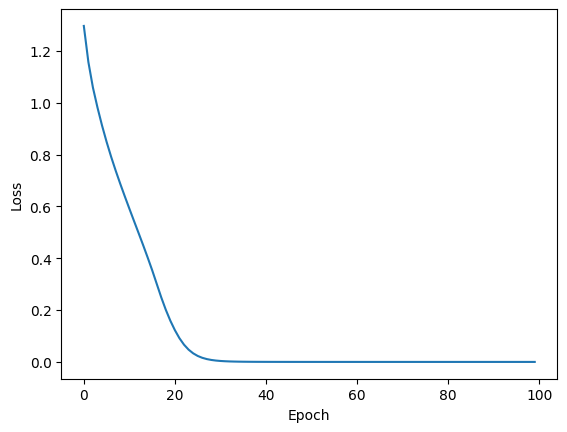

In [15]:
#graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
#

In [16]:
# Evaluate model with test set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [17]:
loss

tensor(2.3018e-05)

In [18]:
from numpy import argmax
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # Will tell us what kind of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) tensor([ 4.4823, -9.6277, -8.1320]) 	 0 	 0
2.) tensor([ 4.0695, -8.4376, -7.0871]) 	 0 	 0
3.) tensor([  5.5104, -12.1428, -10.3168]) 	 0 	 0
4.) tensor([ 4.5497, -9.7454, -8.2272]) 	 0 	 0
5.) tensor([  4.7954, -10.3707,  -8.7805]) 	 0 	 0
6.) tensor([ 3.8781, -8.0138, -6.7255]) 	 0 	 0
7.) tensor([ 4.2742, -9.0579, -7.6308]) 	 0 	 0
8.) tensor([  5.2110, -11.2768,  -9.5484]) 	 0 	 0
9.) tensor([ 4.4408, -9.5763, -8.0996]) 	 0 	 0
10.) tensor([ 4.2864, -9.1345, -7.7049]) 	 0 	 0
11.) tensor([  5.0046, -10.7892,  -9.1229]) 	 0 	 0
12.) tensor([ 3.4667, -7.0950, -5.9364]) 	 0 	 0
13.) tensor([ 3.8595, -7.9620, -6.6818]) 	 0 	 0
14.) tensor([ 3.5352, -7.2508, -6.0699]) 	 0 	 0
15.) tensor([ 3.8449, -7.8882, -6.6051]) 	 0 	 0
16.) tensor([  4.8032, -10.3037,  -8.7031]) 	 0 	 0
17.) tensor([  5.0739, -10.9983,  -9.3057]) 	 0 	 0
18.) tensor([ 4.1351, -8.8044, -7.4228]) 	 0 	 0
19.) tensor([ 4.3581, -9.3125, -7.8538]) 	 0 	 0
20.) tensor([  4.9717, -10.7701,  -9.1120]) 	 0 	 0
21.) ten

In [19]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [20]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 3.5058, -7.1505, -5.9776])


In [21]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [22]:
with torch.no_grad():
  print(model(newer_iris))

tensor([  4.6835, -10.0580,  -8.4903])


In [23]:
# Save NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [25]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [26]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)